In [27]:
import numpy as np 
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split  
from sklearn import metrics
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
# Read dataset to pandas dataframe
dataset = pd.read_csv("8-dataset.csv", names=names)
X = dataset.iloc[:, :-1]  
y = dataset.iloc[:, -1]
print(X.head())
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.10) 
classifier = KNeighborsClassifier(n_neighbors=5).fit(Xtrain, ytrain) 
ypred = classifier.predict(Xtest)
i = 0
print ("\n-------------------------------------------------------------------------")
print ('%-25s %-25s %-25s' % ('Original Label', 'Predicted Label', 'Correct/Wrong'))
print ("-------------------------------------------------------------------------")
for label in ytest:
    print ('%-25s %-25s' % (label, ypred[i]), end="")
    if (label == ypred[i]):
        print (' %-25s' % ('Correct'))
    else:
        print (' %-25s' % ('Wrong'))
    i = i + 1
print ("-------------------------------------------------------------------------")
print("\nConfusion Matrix:\n",metrics.confusion_matrix(ytest, ypred))  
print ("-------------------------------------------------------------------------")
print("\nClassification Report:\n",metrics.classification_report(ytest, ypred)) 
print ("-------------------------------------------------------------------------")
print('Accuracy of the classifer is %0.2f' % metrics.accuracy_score(ytest,ypred))
print ("-------------------------------------------------------------------------")

   sepal-length  sepal-width  petal-length  petal-width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

-------------------------------------------------------------------------
Original Label            Predicted Label           Correct/Wrong            
-------------------------------------------------------------------------
Iris-versicolor           Iris-versicolor           Correct                  
Iris-virginica            Iris-virginica            Correct                  
Iris-versicolor           Iris-versicolor           Correct                  
Iris-setosa               Iris-setosa               Correct                  
Iris-versicolor           Iris-versicolor           Correct                  
Iris-setosa               Iris-setosa          

C:\Users\Lisha M\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lisha M\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


The accuracy score of K-Mean:  0.24
The Confusion matrixof K-Mean:
 [[ 0 50  0]
 [48  0  2]
 [14  0 36]]


C:\Users\Lisha M\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


The accuracy score of EM:  0.36666666666666664
The Confusion matrix of EM:
  [[50  0  0]
 [ 0  5 45]
 [ 0 50  0]]


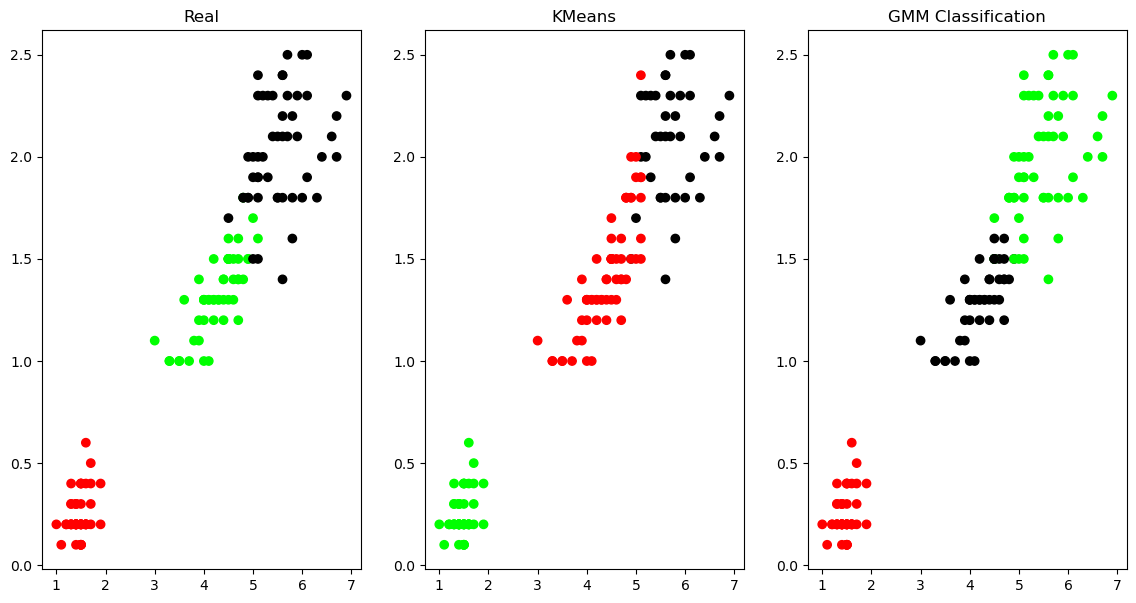

In [28]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import sklearn.metrics as metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
names = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width', 'Class']
dataset = pd.read_csv("8-dataset.csv", names=names)
X = dataset.iloc[:, :-1]  
label = {'Iris-setosa': 0,'Iris-versicolor': 1, 'Iris-virginica': 2} 
y = [label[c] for c in dataset.iloc[:, -1]]
plt.figure(figsize=(14,7))
colormap=np.array(['red','lime','black'])
# REAL PLOT
plt.subplot(1,3,1)
plt.title('Real')
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[y])
# K-PLOT
model=KMeans(n_clusters=3, random_state=0).fit(X)
plt.subplot(1,3,2)
plt.title('KMeans')
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[model.labels_])
print('The accuracy score of K-Mean: ',metrics.accuracy_score(y, model.labels_))
print('The Confusion matrixof K-Mean:\n',metrics.confusion_matrix(y, model.labels_))
# GMM PLOT
gmm=GaussianMixture(n_components=3, random_state=0).fit(X)
y_cluster_gmm=gmm.predict(X)
plt.subplot(1,3,3)
plt.title('GMM Classification')
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[y_cluster_gmm])
print('The accuracy score of EM: ',metrics.accuracy_score(y, y_cluster_gmm))
print('The Confusion matrix of EM:\n ',metrics.confusion_matrix(y, y_cluster_gmm))

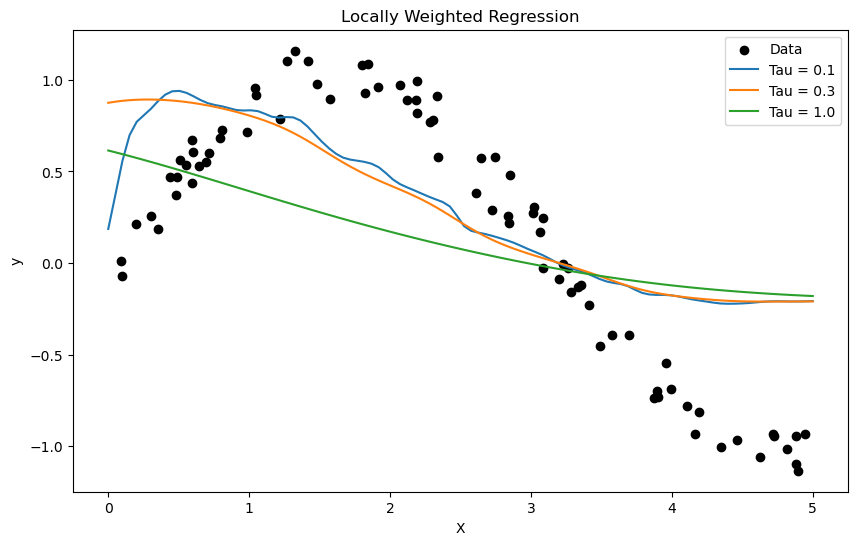

In [29]:
import numpy as np
import matplotlib.pyplot as plt

def locally_weighted_regression(test_point, X, y, tau):
        weights = np.exp(-np.sum((X - test_point) ** 2, axis=1) / (2 * tau ** 2)) 
        W = np.diag(weights) 
        X_transpose = np.transpose(X) 
        theta = np.linalg.inv(X_transpose @ W @ X) @ (X_transpose @ W @ y) 
        return theta 

np.random.seed(0) 
X = np.sort(5 * np.random.rand(80, 1), axis=0) 
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0]) 
X_test = np.linspace(0, 5, 100)[:, np.newaxis] 
tau_values = [0.1, 0.3, 1.0] # Bandwidth parameter values 
plt.figure(figsize=(10, 6)) 
plt.scatter(X, y, color='black', label='Data') 

for tau in tau_values: 
        y_pred = [locally_weighted_regression(test_point, X, y, tau) for test_point in X_test] 
        plt.plot(X_test, y_pred, label=f'Tau = {tau:.1f}') 

plt.xlabel('X') 
plt.ylabel('y') 
plt.title('Locally Weighted Regression')
plt.legend() 
plt.show()



In [30]:
import numpy as np 
inputNeurons=2 
hiddenlayerNeurons=4 
outputNeurons=2 
iteration=6000
 
input = np.random.randint(1,5,inputNeurons) 
output = np.array([1.0,0.0]) 
hidden_layer=np.random.rand(1,hiddenlayerNeurons)
 
hidden_biass=np.random.rand(1,hiddenlayerNeurons) 
output_bias=np.random.rand(1,outputNeurons) 
hidden_weights=np.random.rand(inputNeurons,hiddenlayerNeurons) 
output_weights=np.random.rand(hiddenlayerNeurons,outputNeurons)
 
def sigmoid (layer):
    return 1/(1 + np.exp(-layer))
 
def gradient(layer): 
    return layer*(1-layer)
for i in range(iteration):
 
    hidden_layer=np.dot(input,hidden_weights) 
    hidden_layer=sigmoid(hidden_layer+hidden_biass)
    output_layer=np.dot(hidden_layer,output_weights) 
    output_layer=sigmoid(output_layer+output_bias)
    error = (output-output_layer) 
    gradient_outputLayer=gradient(output_layer)
    error_terms_output=gradient_outputLayer * error 
    error_terms_hidden=gradient(hidden_layer)*np.dot(error_terms_output,output_weights.T)
    gradient_hidden_weights = np.dot(input.reshape(inputNeurons,1),error_terms_hidden.reshape(1,hiddenlayerNeurons))
    gradient_ouput_weights = np.dot(hidden_layer.reshape(hiddenlayerNeurons,1),error_terms_output.reshape(1,outputNeurons))
    hidden_weights = hidden_weights + 0.05*gradient_hidden_weights 
    output_weights = output_weights + 0.05*gradient_ouput_weights 
    if i<50 or i>iteration-50:
        print("**********************") 
        print("iteration:",i,"::::",error) 
        print("###output########",output_layer) 

**********************
iteration: 0 :::: [[ 0.08417067 -0.93938831]]
###output######## [[0.91582933 0.93938831]]
**********************
iteration: 1 :::: [[ 0.08413601 -0.93881796]]
###output######## [[0.91586399 0.93881796]]
**********************
iteration: 2 :::: [[ 0.08410222 -0.93823801]]
###output######## [[0.91589778 0.93823801]]
**********************
iteration: 3 :::: [[ 0.08406932 -0.93764823]]
###output######## [[0.91593068 0.93764823]]
**********************
iteration: 4 :::: [[ 0.08403732 -0.9370484 ]]
###output######## [[0.91596268 0.9370484 ]]
**********************
iteration: 5 :::: [[ 0.08400623 -0.93643829]]
###output######## [[0.91599377 0.93643829]]
**********************
iteration: 6 :::: [[ 0.08397608 -0.93581765]]
###output######## [[0.91602392 0.93581765]]
**********************
iteration: 7 :::: [[ 0.08394687 -0.93518623]]
###output######## [[0.91605313 0.93518623]]
**********************
iteration: 8 :::: [[ 0.08391862 -0.93454379]]
###output######## [[0.91608

In [31]:
import numpy as np

def fitness_function(x):
    return x**2 + 4*x + 4

population_size = 50
num_generations = 100
mutation_rate = 0.1

population = np.random.uniform(-10, 10, size=(population_size))

for generation in range(num_generations):
    fitness_values = np.array([fitness_function(x) for x in population])
    parents = np.random.choice(population, size=population_size, p=fitness_values / np.sum(fitness_values))

    children = []
    for _ in range(population_size):
        parent1 = np.random.choice(parents)
        parent2 = np.random.choice(parents)
        child = (parent1 + parent2) / 2

        if np.random.rand() < mutation_rate:
            child += np.random.normal(scale=0.5)
        children.append(child)
        
    population = np.array(children)
    best_solution = population[np.argmin([fitness_function(x) for x in population])]

print("Best Solution:", best_solution)
print("Minimum Value:", fitness_function(best_solution))

Best Solution: 8.878872670029292
Minimum Value: 118.34987057071025


In [32]:
import numpy as np

# Grid world settings
grid_size = 5
num_actions = 4 # up, down, left, right
num_states = grid_size * grid_size

# Q-learning parameters
learning_rate = 0.8
discount_factor = 0.95
num_episodes = 1000

# Initialize Q-values
Q = np.zeros((num_states, num_actions))

# Obstacle and goal positions
obstacle_positions = [(1, 1), (2, 2), (3, 3)]
goal_position = (4, 4)

# Convert (row, column) coordinates to state index
def state_from_position(position):
    return position[0] * grid_size + position[1]

# Q-learning algorithm
for episode in range(num_episodes):
    current_position = (0, 0) # Starting position

    while current_position != goal_position:
        state = state_from_position(current_position)
        valid_actions = [action for action in range(num_actions) if current_position != obstacle_positions]
        action = np.random.choice(valid_actions)
        next_row, next_col = current_position

        if action == 0: # Move up
            next_row = max(next_row - 1, 0)
        elif action == 1: # Move down
            next_row = min(next_row + 1, grid_size - 1)
        elif action == 2: # Move left
            next_col = max(next_col - 1, 0)
        else: # Move right
            next_col = min(next_col + 1, grid_size - 1)

        next_state = state_from_position((next_row, next_col))

        if next_state == state_from_position(goal_position):
            reward = 10
        elif next_state in [state_from_position(pos) for pos in obstacle_positions]:
            reward = -5
        else:
            reward = 0

        # Update Q-value using Q-learning equation
        Q[state, action] = (1 - learning_rate) * Q[state, action] + learning_rate * (reward + discount_factor * np.max(Q[next_state, :]))
        current_position = (next_row, next_col)

# Test the learned policy
current_position = (0, 0)
path = [(0, 0)]

while current_position != goal_position:
    state = state_from_position(current_position)
    action = np.argmax(Q[state, :])
    next_row, next_col = current_position

    if action == 0: # Move up
        next_row = max(next_row - 1, 0)
    elif action == 1: # Move down
        next_row = min(next_row + 1, grid_size - 1)
    elif action == 2: # Move left
        next_col = max(next_col - 1, 0)
    else: # Move right
        next_col = min(next_col + 1, grid_size - 1)
        
    path.append((next_row, next_col))
    current_position = (next_row, next_col)

print("Learned Policy Path:")
for row in range(grid_size):
    for col in range(grid_size):
        if (row, col) == goal_position:
            print(" G ", end='')
        elif (row, col) in obstacle_positions:
            print(" X ", end='')
        elif (row, col) in path:
            print(" * ", end='')
        else:
            print(" . ", end='')
    print()

Learned Policy Path:
 *  .  .  .  . 
 *  X  .  .  . 
 *  .  X  .  . 
 *  .  .  X  . 
 *  *  *  *  G 
